In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import cv2

In [2]:
DATA_DIR=r"C:\Users\speed\Documents\Fast Food Classification TensorFlow CNN\data"

# Initialize TensorBoard

In [3]:
tsb=tf.keras.callbacks.TensorBoard(log_dir="logs")

# Create Dataset

In [4]:
classes=[i for i in os.listdir(DATA_DIR)]
train=[]
for i in os.listdir(DATA_DIR):
    current_path=os.path.join(DATA_DIR,i)
    current_class=classes.index(i)
    for j in os.listdir(current_path):
        try:
            img=cv2.imread(os.path.join(DATA_DIR,i,j),cv2.IMREAD_GRAYSCALE)
            img=cv2.resize(img,[70,70])
            train.append([img,current_class])
        except:
            continue
x=[]
y=[]
for i,j in train:
    x.append(i)
    y.append(j)
x=np.array(x)
y=np.array(y)

# Create Model

In [5]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(70,70,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(len(classes),activation="softmax")
])

# Get Summary Of Model 

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

# Compile The Model

In [7]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train The Model

In [8]:
history=model.fit(x,y,epochs=100,callbacks=[tsb],validation_split=0.1)

Epoch 1/100
211/211 [==============================] - 42s 199ms/step - loss: 3.5885 - accuracy: 0.2545 - val_loss: 2.1607 - val_accuracy: 0.0000e+00
Epoch 2/100
211/211 [==============================] - 47s 222ms/step - loss: 1.5507 - accuracy: 0.2702 - val_loss: 2.2550 - val_accuracy: 0.0027
Epoch 3/100
211/211 [==============================] - 45s 212ms/step - loss: 1.5346 - accuracy: 0.2902 - val_loss: 2.5338 - val_accuracy: 0.0027
Epoch 4/100
211/211 [==============================] - 42s 200ms/step - loss: 1.4828 - accuracy: 0.3289 - val_loss: 2.3907 - val_accuracy: 0.0040
Epoch 5/100
211/211 [==============================] - 43s 203ms/step - loss: 1.4269 - accuracy: 0.3702 - val_loss: 2.4723 - val_accuracy: 0.0187
Epoch 6/100
211/211 [==============================] - 44s 207ms/step - loss: 1.3603 - accuracy: 0.4132 - val_loss: 2.4447 - val_accuracy: 0.0240
Epoch 7/100
211/211 [==============================] - 45s 215ms/step - loss: 1.2893 - accuracy: 0.4687 - val_loss: 2.40

211/211 [==============================] - 47s 225ms/step - loss: 0.0391 - accuracy: 0.9893 - val_loss: 13.7053 - val_accuracy: 0.1560
Epoch 57/100
211/211 [==============================] - 41s 194ms/step - loss: 0.0141 - accuracy: 0.9972 - val_loss: 14.8342 - val_accuracy: 0.1493
Epoch 58/100
211/211 [==============================] - 42s 197ms/step - loss: 0.0049 - accuracy: 0.9993 - val_loss: 15.2444 - val_accuracy: 0.1680
Epoch 59/100
211/211 [==============================] - 42s 197ms/step - loss: 0.0039 - accuracy: 0.9996 - val_loss: 15.4537 - val_accuracy: 0.1600
Epoch 60/100
211/211 [==============================] - 47s 223ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 15.6151 - val_accuracy: 0.1467
Epoch 61/100
211/211 [==============================] - 51s 243ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 15.9610 - val_accuracy: 0.1533
Epoch 62/100
211/211 [==============================] - 51s 240ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 15.9112 

# Accuracy Graph

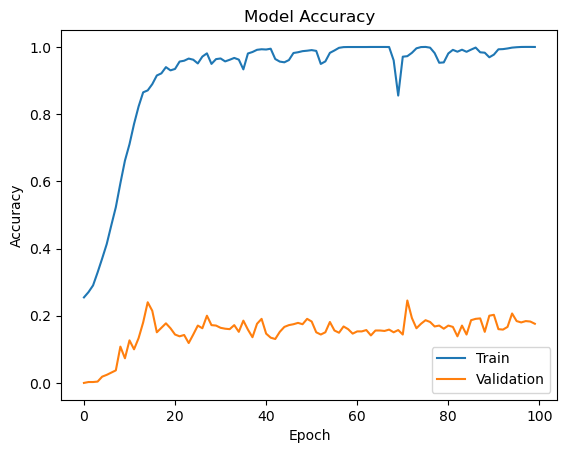

In [9]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Loss Graph

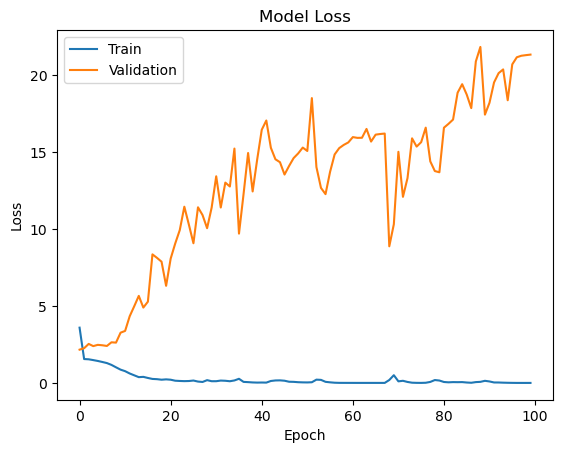

In [10]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Predict On Images

In [11]:
def prepare(filepath):
    img=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(70,70))
    return img.reshape(-1,70,70,1)

1/1 [==============================] - 0s 27ms/step
Prediction : Pizza
Actual : Pizza


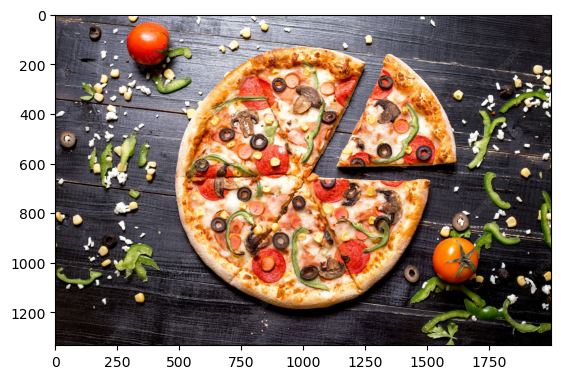

In [18]:
path=r"C:\Users\speed\Downloads\top-view-pepperoni-pizza-sliced-into-six-slices_141793-2157.jpg"
print(f"Prediction : {classes[int(np.argmax(model.predict(prepare(path))))]}")
print("Actual : Pizza")
plt.imshow(plt.imread(path))

1/1 [==============================] - 0s 24ms/step
Prediction : Burger
Actual : Burger


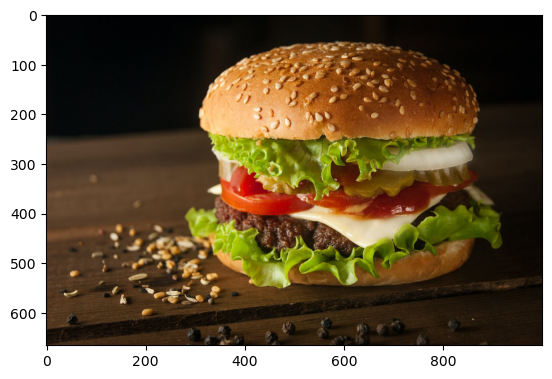

In [20]:
path=r"C:\Users\speed\Downloads\photo-1571091718767-18b5b1457add.jpg"
print(f"Prediction : {classes[int(np.argmax(model.predict(prepare(path))))]}")
print("Actual : Burger")
plt.imshow(plt.imread(path))

1/1 [==============================] - 0s 28ms/step
Prediction : Sandwich
Actual : Sandwich


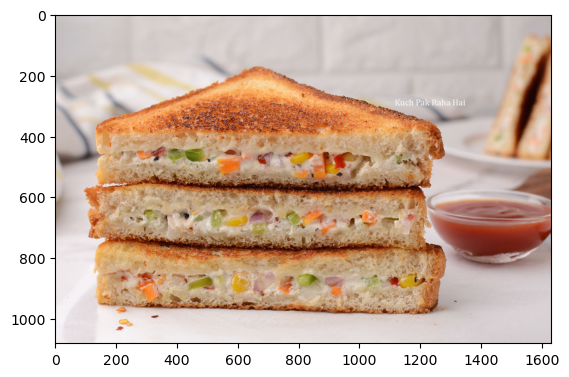

In [27]:
path=r"C:\Users\speed\Downloads\istockphoto-157431311-1024x1024.jpg"
print(f"Prediction : {classes[int(np.argmax(model.predict(prepare(path))))]}")
print("Actual : Sandwich")
plt.imshow(plt.imread(path))

1/1 [==============================] - 0s 38ms/step
Prediction : Hot Dog
Actual : Hot Dog


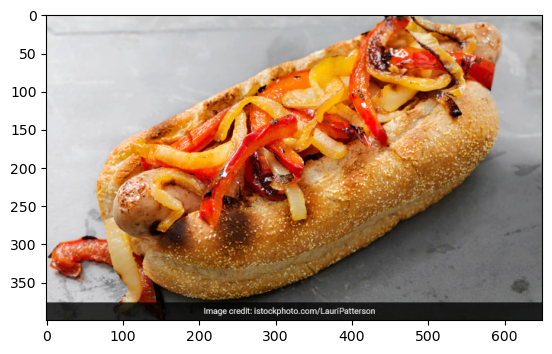

In [29]:
path=r"C:\Users\speed\Downloads\jm1ktqao_chicken-dog_625x300_28_September_21.jpg"
print(f"Prediction : {classes[int(np.argmax(model.predict(prepare(path))))]}")
print("Actual : Hot Dog")
plt.imshow(plt.imread(path))

1/1 [==============================] - 0s 22ms/step
Prediction : Donut
Actual : Donut


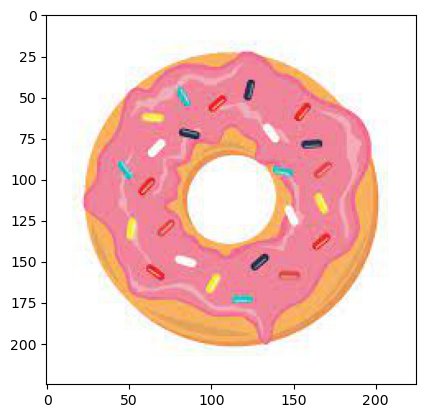

In [30]:
path=r"C:\Users\speed\Downloads\download.jpg"
print(f"Prediction : {classes[int(np.argmax(model.predict(prepare(path))))]}")
print("Actual : Donut")
plt.imshow(plt.imread(path))

# Save The Model

In [12]:
model.save("64x3-fast_food.h5")

# Covert Model To TFLite Model For Edge Devices

In [13]:
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
with open("64x3-fast_food.tflite","wb") as f:
    f.write(tf_lite_converter.convert())

INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpxoetfi5i\assets


INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpxoetfi5i\assets
